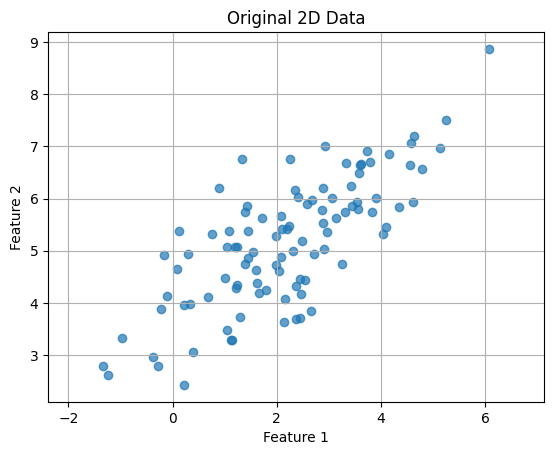

Covariance Matrix:
 [[2.28165958 1.40082016]
 [1.40082016 1.50064765]]
Eigenvalues: [3.34538606 0.43692116]
Eigenvectors:
 [[ 0.79640776 -0.60476002]
 [ 0.60476002  0.79640776]]


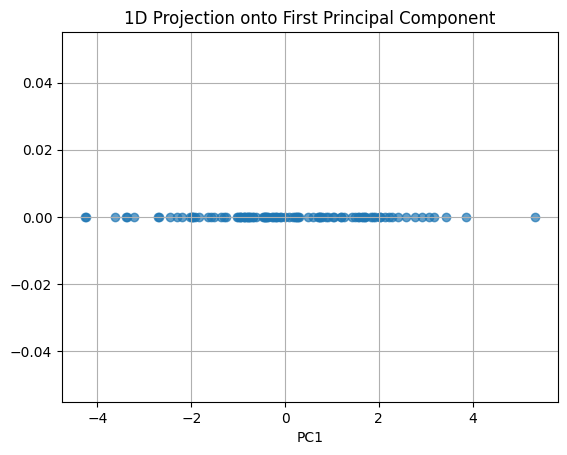

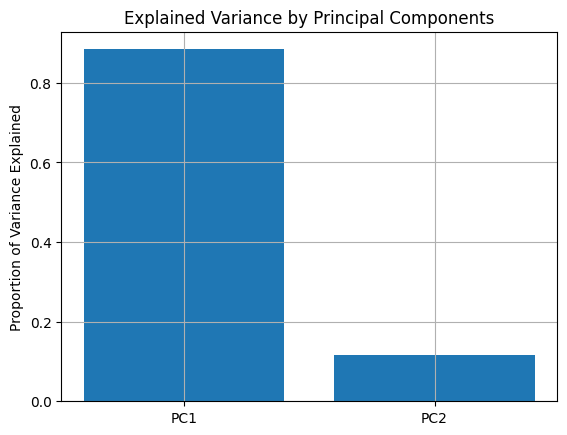

In [1]:
# PART 1
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a 2D dataset with specified mean and covariance
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

# Step 2: Plot the original 2D data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.savefig("pca_original_data.png")
plt.show()

# Step 3: Center the data (subtract mean from each feature)
X_centered = X - np.mean(X, axis=0)

# Step 4: Compute the covariance matrix
cov_matrix = np.cov(X_centered.T)
print("Covariance Matrix:\n", cov_matrix)

# Step 5: Compute eigenvalues and eigenvectors of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print("Eigenvalues:", eig_vals)
print("Eigenvectors:\n", eig_vecs)

# Step 6: Project the data onto the first principal component (PC1)
pc1 = eig_vecs[:, 0]
X_pca_1d = X_centered @ pc1  # Matrix multiplication to get 1D projection

# Step 7: Plot the 1D projection
plt.scatter(X_pca_1d, np.zeros_like(X_pca_1d), alpha=0.7)
plt.title("1D Projection onto First Principal Component")
plt.xlabel("PC1")
plt.grid(True)
plt.savefig("pca_1d_projection.png")
plt.show()

# Step 8: Plot the variance explained by each component
explained_variance = eig_vals / np.sum(eig_vals)
plt.bar(["PC1", "PC2"], explained_variance)
plt.title("Explained Variance by Principal Components")
plt.ylabel("Proportion of Variance Explained")
plt.grid(True)
plt.savefig("pca_explained_variance.png")
plt.show()


Shape of X: (100, 64)
Each sample has 64 features representing an 8x8 image of a handwritten digit.
Running t-SNE with perplexity = 5


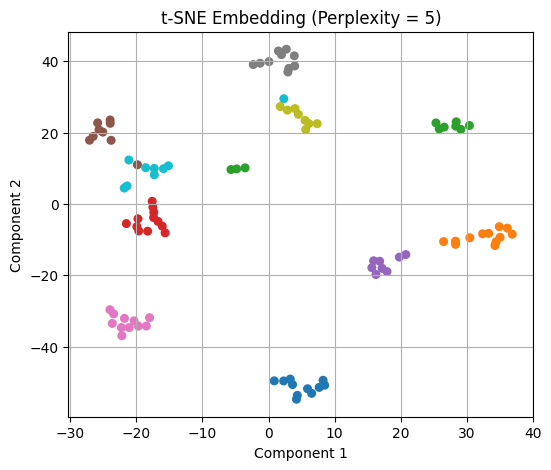

Running t-SNE with perplexity = 30


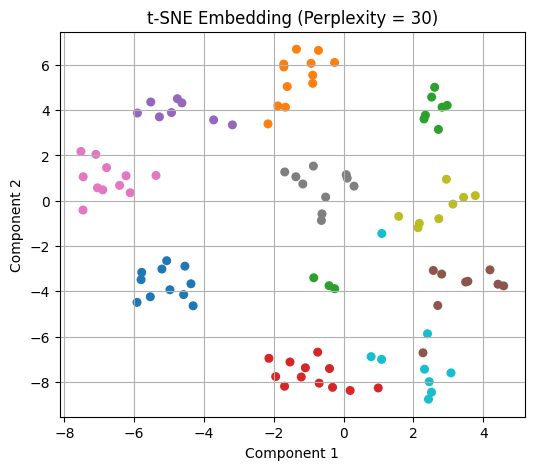

Running t-SNE with perplexity = 50


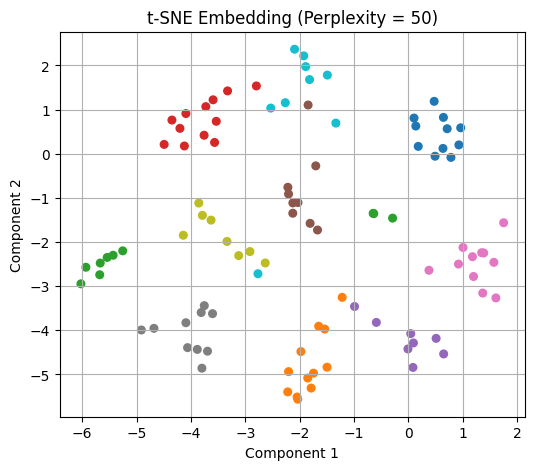

In [2]:
# PART 2
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# Step 1: Load the digits dataset
digits = load_digits()
X = digits.data[:100]   # Use only 100 samples for faster t-SNE execution
y = digits.target[:100]

print("Shape of X:", X.shape)  # (100, 64)
print("Each sample has 64 features representing an 8x8 image of a handwritten digit.")

# Step 2: Run t-SNE with different perplexity values
perplexities = [5, 30, 50]

for perplexity in perplexities:
    print(f"Running t-SNE with perplexity = {perplexity}")

    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_embedded = tsne.fit_transform(X)

    # Step 3: Visualize the 2D t-SNE embedding
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10', s=30)
    plt.title(f"t-SNE Embedding (Perplexity = {perplexity})")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)

    # Step 4: Save each figure
    plt.savefig(f"tsne_digits_perplexity_{perplexity}.png")
    plt.show()
